Basic review regarding performance of various algos, loops, etc.

In [5]:
import cython
import numpy as np

In [12]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [1]:
def is_prime(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [2]:
n = int(1e8 + 3)
n

100000003

In [3]:
%time is_prime(n)

CPU times: user 36 µs, sys: 1 µs, total: 37 µs
Wall time: 41 µs


False

In [4]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [6]:
%time fib_it_py(80)

CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 15 µs


23416728348467685

In [14]:
import random
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [15]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1) for _ in range(500)]

In [16]:
rn = np.array(rn)
rn[:5]

array([[-0.08023145,  0.59874126],
       [-0.5499544 , -0.15711786],
       [-0.52930565, -0.85912019],
       [ 0.9297175 ,  0.34904051],
       [ 0.69737742,  0.18399394]])

(-1.1, 1.1)

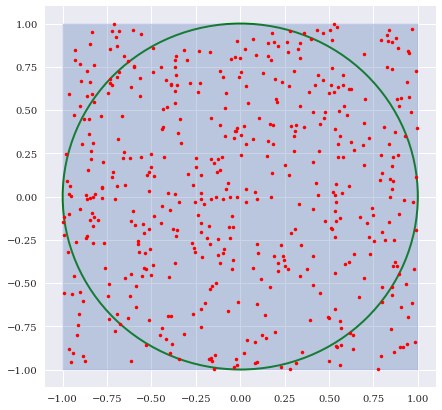

In [18]:
fig = plt.figure(figsize=(7 ,7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius = 1, edgecolor='g', lw=2.0, facecolor ='None')
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:, 0], rn[:, 1], 'r.')
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)

In [21]:
def mcs_pi_py(n): #takes awhile
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [20]:
mcs_pi_py(n)

3.14187934574362

### Monte Carlo Simulation

In [37]:
import math
from sympy import *
init_printing()

In [38]:
dS_t, r, S_t, dt, dZ_t, sigma = symbols('dS_t, r, S_t, dt, dZ_t, sigma')
dS_t = r*S_t*dt + sigma*S_t*dZ_t
dS_t # Black-Scholes-Merton SDE (geometric Brownian motion/ Stochastic Differential Equation)


In [39]:
M = 100 #number of intervals for discretization
I = 50000 #number of paths to be simulated
S0 = 36.
T = 1.0
r = 0.06
sigma = 0.2

In [40]:
def mcs_simulation_py(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape) #the random numbers drawn in a single, vectorized step
    for t in range(1, M + 1): #nested loop implementing simulation based on the Euler scheme
        for i in range(I):
            S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt + sigma * math.sqrt(dt) * rn[t, i])
    return S

In [41]:
S = mcs_simulation_py((M, I))

In [42]:
S[-1].mean() #mean end-of-period value based on the simulation

In [44]:
S0 * math.exp(r * T) #theoretically expected end-of-period value

In [45]:
K = 40. #strike price of European put option

In [47]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean() #Monte Carlo estimator for the option
C0